In [1]:
%run ../../multibench.py

In [2]:
%%bash
alias cobs=/home/manzik/Documents/cmdbench/repo/bioinformatics/cobs/basic-test/cobs/build/src/cobs

In [3]:
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile

# Move two upper directories, import benchmark, revert cwd
sys.path.append("../..")
import cmdbench

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])



In [4]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['2014C-3655', '2014C-3656', '2014C-3850', '2014C-3840', '2014C-3600', '2014C-3598', '2014C-3907', '2014C-3599', '2014C-3857']


In [5]:
sample_sizes = list(range(1, 16 + 1))
sample_sizes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [6]:
def reset_func():
    # Delete indexed data
    os.system("bigsi delete")

    # Delete all saved bigsi data
    clean_if_exists("bigsi-data")
    clean_if_exists("test-berkeley.db")
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    # Copy files we want to be part of the sample
    # from inputs to cobs-data/samples/ and return their path
    samples = input_samples[:sample_size]
    clean_if_exists("cobs-data/samples/")
    samples_out = []
    for sample in samples:
        infile1, infile2 = "input/%s_1.fastq.gz" % sample, "input/%s_2.fastq.gz" % sample
        outfile1, outfile2 = "cobs-data/samples/%s_1.fastq.gz" % sample, "cobs-data/samples/%s_2.fastq.gz" % sample
        copyfile(infile1, outfile1)
        copyfile(infile2, outfile2)
    return ["cobs-data/samples/"]

build_command = {
    "command": "cobs/build/src/cobs compact-construct % cobs-data/example.cobs_compact",
    "parallel_args": "-j 1 -I%"
}

query_repeat_count = 2
query_sequence = "GAAGAAGATGGTGTACGCGGTGCGCGCCGCTATCTCGACCACCTTAAAATGGAATATGCCTTCTGGATGGACG"

query_command = {
    "command": "cobs/build/src/cobs query -i cobs-data/example.cobs_compact %",
    "argfiles": [query_sequence] * query_repeat_count,
    "parallel_args": "-j 1 -I%"
}

multibench_results, debug_str = multi_cmdbench({
"index": [build_command],
"query": [query_command]
}, reset_func = reset_func, iterations = 100, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results=benchmark_list_to_results)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'memory': 25970319.36, 'disk_read': 1895173.53, 'disk_write': 430988.5, 'runtime': 0.16930000000000003}, {'memory': 26460200.96, 'disk_read': 2092927.24, 'disk_write': 437121.92, 'runtime': 0.16950000000000007}, {'memory': 26307584.0, 'disk_read': 2316955.1, 'disk_write': 441436.63, 'runtime': 0.17160000000000003}, {'memory': 25769697.28, 'disk_read': 2521919.64, 'disk_write': 446971.69, 'runtime': 0.1710000000000001}, {'memory': 25864110.08, 'disk_read': 2857448.0, 'disk_write': 454266.01, 'runtime': 0.1728}, {'memory': 26225704.96, 'disk_read': 3217485.96, 'disk_write': 461158.78, 'runtime': 0.17460000000000012}, {'memory': 26203136.0, 'disk_read': 3450115.8, 'disk_write': 463568.35, 'runtime': 0.17550000000000004}, {'memory': 26135019.52, 'disk_read': 3807138.96, 'disk_write': 468240.13, 'runtime': 0.1756000000000001}, {'memory': 26065264.64, 'disk_read': 4027002.19, 'disk_write': 471736.79, 'runtime': 0.17650000000000013}, {'memory': 26143170.56, 'disk_read': 4027007.98, 'disk_wr

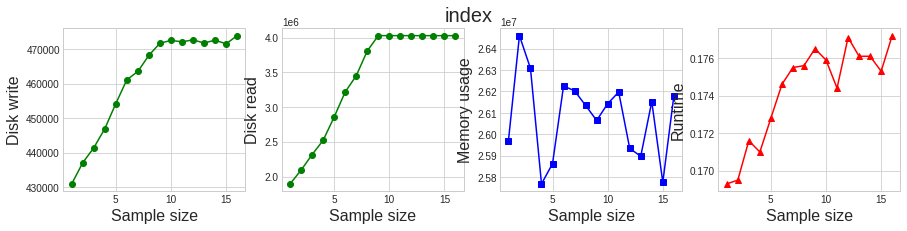

In [8]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "index")

[{'memory': 25549742.08, 'disk_read': 1764343.61, 'disk_write': 180161.52, 'runtime': 0.10029999999999994}, {'memory': 25791324.16, 'disk_read': 1764350.58, 'disk_write': 184589.5, 'runtime': 0.10099999999999998}, {'memory': 26020495.36, 'disk_read': 1764327.03, 'disk_write': 180158.81, 'runtime': 0.09949999999999992}, {'memory': 25227018.24, 'disk_read': 1764498.92, 'disk_write': 184019.27, 'runtime': 0.10009999999999998}, {'memory': 25698918.4, 'disk_read': 1764502.94, 'disk_write': 179924.55, 'runtime': 0.10029999999999996}, {'memory': 25786245.12, 'disk_read': 1764506.03, 'disk_write': 179761.97, 'runtime': 0.10159999999999997}, {'memory': 25175531.52, 'disk_read': 1764717.21, 'disk_write': 181750.24, 'runtime': 0.10149999999999995}, {'memory': 25323724.8, 'disk_read': 1764718.02, 'disk_write': 182646.68, 'runtime': 0.10239999999999996}, {'memory': 25655992.32, 'disk_read': 1764546.95, 'disk_write': 184682.19, 'runtime': 0.10229999999999995}, {'memory': 25747660.8, 'disk_read': 176

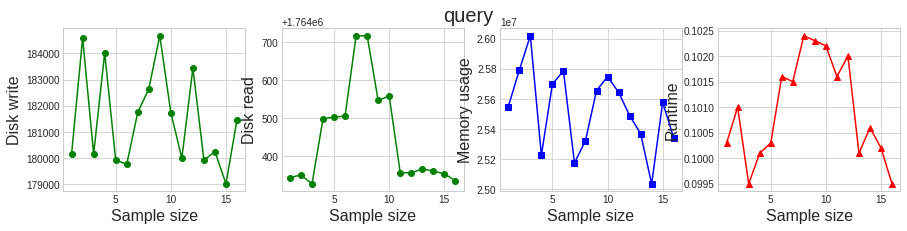

In [9]:
# Querying Plots
plot_resources(multibench_results, sample_sizes, "query")